In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# torch
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models, datasets

#Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theraghavjuneja","key":"d24836b84ec39cad87a34aef68ea0283"}'}

In [ ]:
import os
import zipfile


os.makedirs('/root/.kaggle', exist_ok=True)

!mv kaggle.json /root/.kaggle/


!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [ ]:
with zipfile.ZipFile("/content/brain-tumor-mri-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("brain-tumor")


In [ ]:
import os

def count_files_and_folders(directory):
    # Loop through each folder in the specified directory
    for root, dirs, files in os.walk(directory):
        # Skip the root directory itself
        if root == directory:
            continue

        # Count the number of files and folders in the current directory
        num_files = len(files)
        num_folders = len(dirs)

        # Print the results for this folder
        print(f"Folder: {root}")
        print(f"  Files: {num_files}")
        print(f"  Subfolders: {num_folders}")
        print("-" * 40)

# Specify the path to the directory you want to analyze
directory_path = '/content/brain-tumor'
count_files_and_folders(directory_path)


Folder: /content/brain-tumor/Testing
  Files: 0
  Subfolders: 4
----------------------------------------
Folder: /content/brain-tumor/Testing/meningioma
  Files: 306
  Subfolders: 0
----------------------------------------
Folder: /content/brain-tumor/Testing/pituitary
  Files: 300
  Subfolders: 0
----------------------------------------
Folder: /content/brain-tumor/Testing/glioma
  Files: 300
  Subfolders: 0
----------------------------------------
Folder: /content/brain-tumor/Testing/notumor
  Files: 405
  Subfolders: 0
----------------------------------------
Folder: /content/brain-tumor/Training
  Files: 0
  Subfolders: 4
----------------------------------------
Folder: /content/brain-tumor/Training/meningioma
  Files: 1339
  Subfolders: 0
----------------------------------------
Folder: /content/brain-tumor/Training/pituitary
  Files: 1457
  Subfolders: 0
----------------------------------------
Folder: /content/brain-tumor/Training/glioma
  Files: 1321
  Subfolders: 0
-----------

In [ ]:
### So for trainin i habve 1339+1595+1457+1321
### for testing i jave 306+405+300+300


In [ ]:
base_directory = '/content/brain-tumor'
train, test = 'Training', 'Testing'
target_size = (224, 224)
random_state = 42
batch_size = 32
num_classes = 4
# device = "cuda" if torch.cuda.is_available() else "cpu"
label_map = {
    'notumor': 0,
    'glioma': 1,
    'meningioma': 2,
    'pituitary': 3
}


In [ ]:
categories = os.listdir(base_directory+'/'+train)
print(categories)

['meningioma', 'pituitary', 'glioma', 'notumor']


In [ ]:
def display_images(dataset_type, num_images=4, image_size=(224, 224)):

    dataset_path = os.path.join(base_directory, dataset_type)

    fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 10))

    for row, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        image_filenames = random.sample(os.listdir(category_path), num_images)  # Select random images

        for col, image_filename in enumerate(image_filenames):
            while image_filename == '.DS_Store':
                image_filename = random.sample(os.listdir(category_path), 1)[0]
            image_path = os.path.join(category_path, image_filename)
            image = Image.open(image_path).resize(image_size)
            axes[row, col].imshow(image, cmap='gray')
            axes[row, col].axis('off')
            axes[row, col].set_title(f"{category}")

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_class_distribution(dataset_type):
    path = os.path.join(base_directory, dataset_type)
    counts = [len(os.listdir(os.path.join(path, cat))) for cat in categories]

    plt.bar(categories, counts, color = ['navy', 'teal', 'darkorange', 'crimson'])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(f"{dataset_type.capitalize()} Set Distribution")
    plt.show()

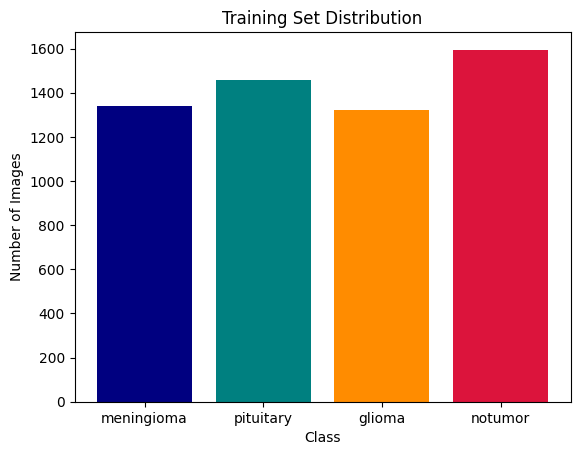

In [ ]:
plot_class_distribution(train)

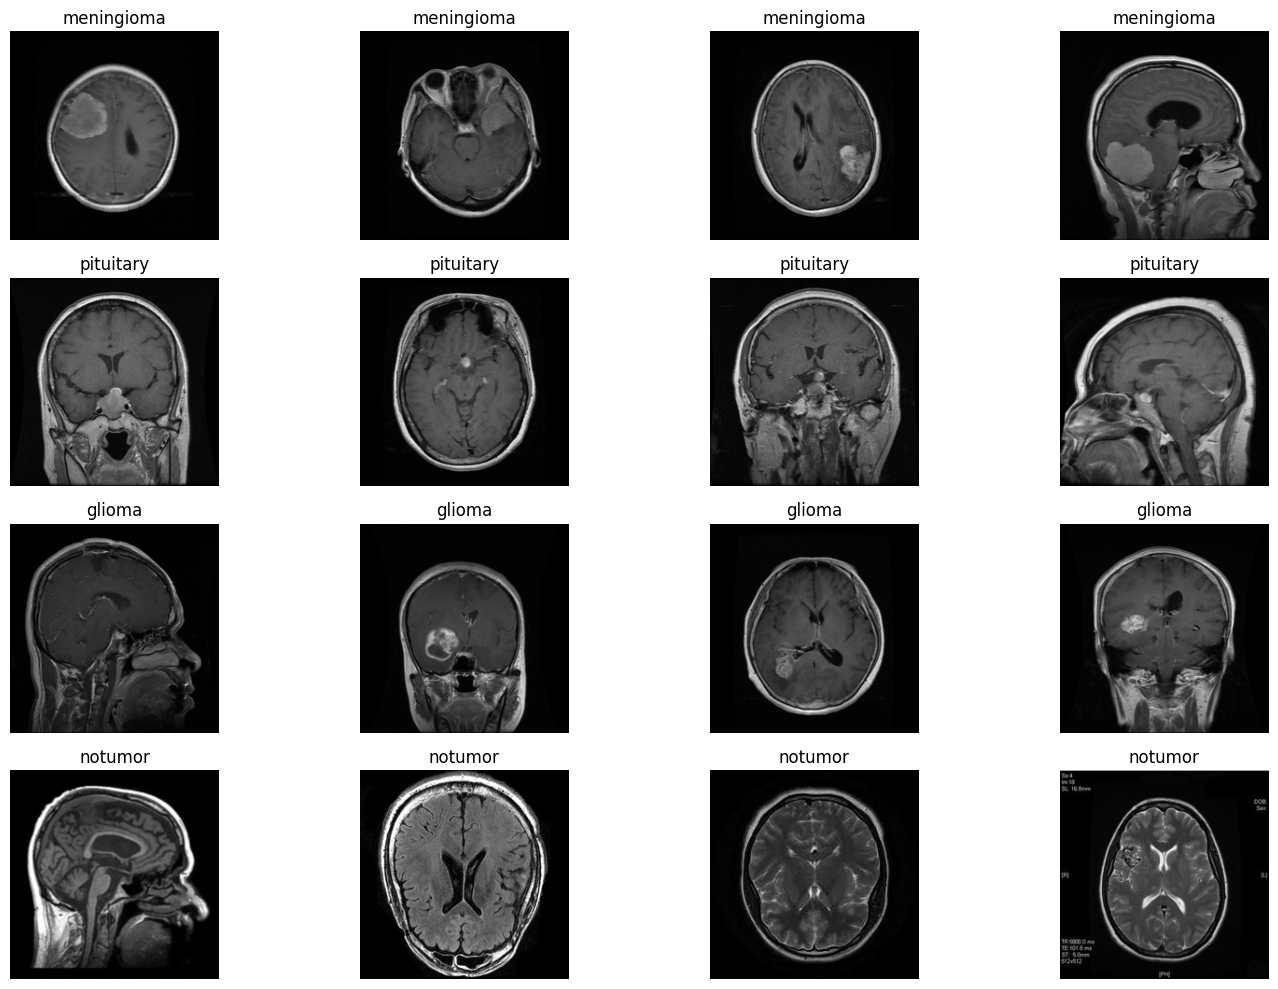

In [ ]:
display_images(train)

Found 5712 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Epoch 1/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 86s 430ms/step - accuracy: 0.5119 - loss: 1.0689 - val_accuracy: 0.7437 - val_loss: 0.8103
Epoch 2/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7188 - loss: 0.5872 - val_accuracy: 0.6891 - val_loss: 0.9439
Epoch 3/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 141s 478ms/step - accuracy: 0.7575 - loss: 0.6092 - val_accuracy: 0.7672 - val_loss: 0.6447
Epoch 4/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8438 - loss: 0.4983 - val_accuracy: 0.7781 - val_loss: 0.5993
Epoch 5/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 142s 486ms/step - accuracy: 0.8277 - loss: 0.4636 - val_accuracy: 0.7578 - val_loss: 0.5109
Epoch 6/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7500 - loss: 0.7398 - val_accuracy: 0.7688 - val_loss: 0.4680
Epoch 7/60
178/178 ━━━━━━━━━━━━━━━━━━━━ 

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9862 - loss: 0.0479
Test Accuracy: 0.9786
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
Classification Report:

              precision    recall  f1-score   support

     notumor       0.99      0.92      0.95       149
      glioma       0.94      0.99      0.97       158
  meningioma       1.00      0.99      1.00       197
   pituitary       0.98      1.00      0.99       151

    accuracy                           0.98       655
   macro avg       0.98      0.98      0.98       655
weighted avg       0.98      0.98      0.98       655



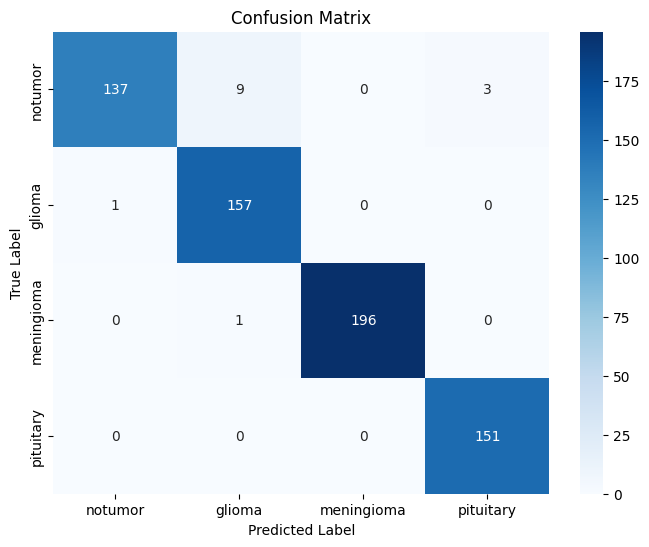

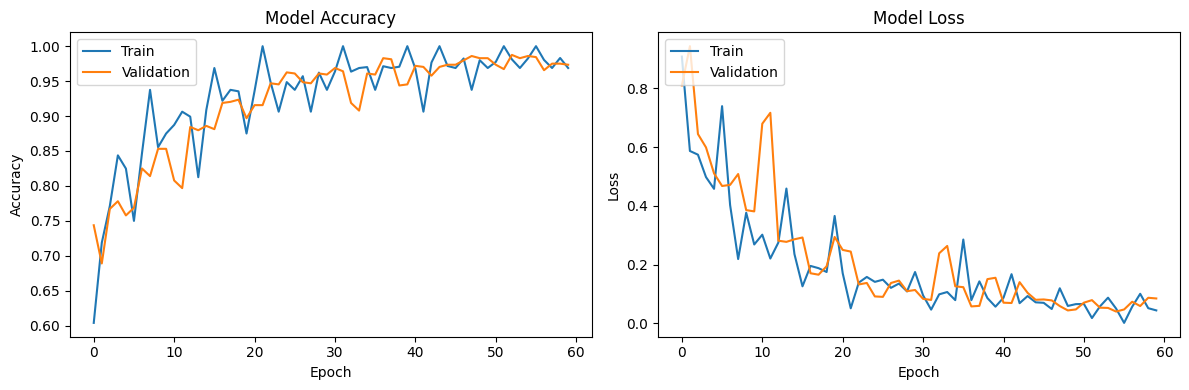

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


base_directory = '/content/brain-tumor'
train, test = 'Training', 'Testing'
target_size = (224, 224)
random_state = 42
batch_size = 32
num_classes = 4


categories = ['notumor', 'glioma', 'meningioma', 'pituitary']


def create_dataset(path, categories):
    my_list = []
    for category in categories:
        category_path = os.path.join(path, category)
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)

            if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                my_list.append([file_path, category])
    return pd.DataFrame(my_list, columns=['file_path', 'label'])

train_df = create_dataset(os.path.join(base_directory, train), categories)
test_df = create_dataset(os.path.join(base_directory, test), categories)


test_df_split, val_df_split = train_test_split(test_df, test_size=0.5, random_state=random_state)
test_df_split = test_df_split.reset_index(drop=True)
val_df_split = val_df_split.reset_index(drop=True)

# ImageDataGenerator with augmentation for training and normalization for testing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values for testing
)

# Define ImageDataGenerators for training, validation, and testing
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_path',
    y_col='label',
    target_size=target_size,  # Resize images to fit the model input
    batch_size=batch_size,
    class_mode='sparse',  # 'sparse' for integer labels, 'categorical' for one-hot encoded labels
    shuffle=True
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=val_df_split,
    x_col='file_path',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df_split,
    x_col='file_path',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Create a label mapping for later use in evaluation
label_map = {class_name: i for i, class_name in enumerate(categories)}

# Define the CNN model using Keras
def create_model(num_classes=4):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


model = create_model(num_classes=num_classes)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=60,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


model.save('best_brain_tumor_model.h5')

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

y_pred = model.predict(test_generator)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()


y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)


print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=categories))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

model.save('best_brain_tumor_model.h5')


files.download('best_brain_tumor_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.9862 - loss: 0.0479
Test Accuracy: 0.9786
